In [ ]:
# Install libraries if not already present
# !pip install pandas numpy scikit-learn matplotlib seaborn

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Load dataset (Upload in Colab or mount from Google Drive)
df = pd.read_csv('/content/ev battery dataset.csv')

# Basic info
print("✅ Dataset Shape:", df.shape)
df.head()


✅ Dataset Shape: (20819, 10)


,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [ ]:
# Drop duplicates & missing values
df = df.drop_duplicates().dropna()

# Convert 'Date' to datetime if available
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Show processed data
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 20733 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20733 non-null  datetime64[ns]
 1   County                                    20733 non-null  int64         
 2   State                                     20733 non-null  int64         
 3   Vehicle Primary Use                       20733 non-null  int64         
 4   Battery Electric Vehicles (BEVs)          20733 non-null  int64         
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20733 non-null  int64         
 6   Electric Vehicle (EV) Total               20733 non-null  int64         
 7   Non-Electric Vehicle Total                20733 non-null  int64         
 8   Total Vehicles                            20733 non-null  int64         
 9   Percent Electric Vehicles        

In [ ]:
# Define target and features
target_col = 'Electric Vehicle (EV) Total' # Corrected target column
X = df.drop(columns=[target_col, 'Date']) # Remove Date column
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


📉 Mean Squared Error: 1625.5665288401258
📈 R² Score: 0.9892666338902811


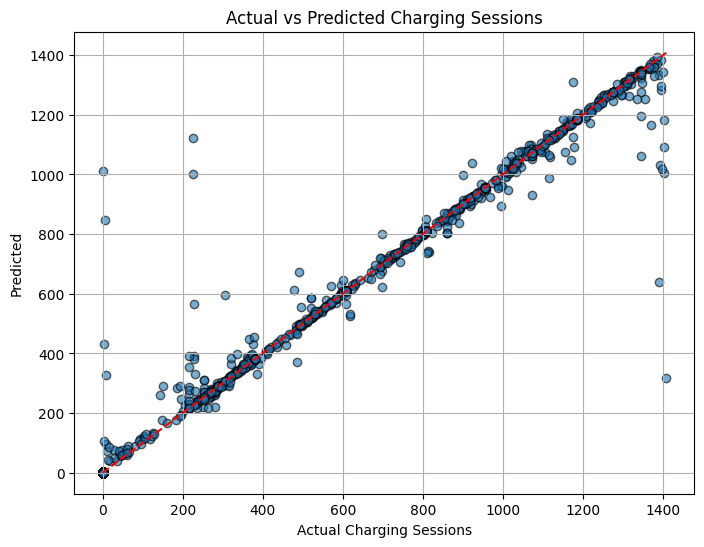

In [ ]:
# Evaluation metrics
print("📉 Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("📈 R² Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Charging Sessions")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Charging Sessions")
plt.grid(True)
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'ev_charging_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Model saved successfully.")


✅ Model saved successfully.
